In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.1


In [2]:
dataset_path = "D:/Medicinal_plant/medicinal_plant_dataset" 

if not os.path.exists(dataset_path):
    print(f"Dataset directory '{dataset_path}' does not exist. Please provide the correct path.")
else:
    print(f"Dataset directory '{dataset_path}' exists.")

print("\nContents of the dataset directory:")
print(os.listdir(dataset_path))


Dataset directory 'D:/Medicinal_plant/medicinal_plant_dataset' exists.

Contents of the dataset directory:
['Aloevera', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Basale', 'Betel', 'Brahmi', 'Bringaraja', 'butterfly pea clitoria ternatea', 'Caricature', 'Castor', 'Chakte', 'Citron lime (herelikai)', 'Coffee', 'Coriender', 'cuban oregano coleus amboinicus', 'Curry', 'Doddapatre', 'Ekka', 'Ganike', 'Gasagase', 'Gauva', 'Ginger', 'green chiretta andrographics paniculata', 'Henna', 'henna lawsonia inermis', 'Honge', 'Insulin', 'Jasmine', 'kachhar bauhinia variegata', 'kamakasturi', 'Kasambruga', 'kepala', 'Lemon', 'Lemon_grass', 'Malabar_Spinach', 'Marigold', 'Mint', 'Nagadali', 'Neem', 'Nerale', 'Nithyapushpa', 'Nooni', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pepper', 'Raddish', 'Raktachandini', 'red flame ivy strobilanthes alternata', 'Sampige', 'Tamarind', 'Thumbe', 'Tulasi', 'Turmeric']


In [3]:
img_size = 224

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.3,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6713 images belonging to 56 classes.
Found 1648 images belonging to 56 classes.


In [4]:
base_model = ResNet50(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')

num_classes = train_generator.num_classes

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


In [5]:
history = model.fit(
    train_generator,
    epochs=50,  # Set to 50 epochs
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

model.save("trained_resnet50_model.h5")


Epoch 1/50


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 93/210 ━━━━━━━━━━━━━━━━━━━━ 10:39 5s/step - accuracy: 0.0246 - loss: 4.3875

C:\Users\ASUS\anaconda3\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (108576768 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


195/210 ━━━━━━━━━━━━━━━━━━━━ 1:21 5s/step - accuracy: 0.0493 - loss: 4.1961

C:\Users\ASUS\anaconda3\Lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


210/210 ━━━━━━━━━━━━━━━━━━━━ 1312s 6s/step - accuracy: 0.0536 - loss: 4.1685 - val_accuracy: 0.0176 - val_loss: 4.7179 - learning_rate: 1.0000e-04
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1267s 6s/step - accuracy: 0.3126 - loss: 2.9566 - val_accuracy: 0.0146 - val_loss: 4.7674 - learning_rate: 1.0000e-04
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1283s 6s/step - accuracy: 0.5169 - loss: 2.2742 - val_accuracy: 0.0097 - val_loss: 4.4195 - learning_rate: 1.0000e-04
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1260s 6s/step - accuracy: 0.6589 - loss: 1.7402 - val_accuracy: 0.1760 - val_loss: 3.5377 - learning_rate: 1.0000e-04
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1265s 6s/step - accuracy: 0.7460 - loss: 1.3680 - val_accuracy: 0.5746 - val_loss: 1.9522 - learning_rate: 1.0000e-04
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1266s 6s/step - accuracy: 0.8161 - loss: 1.0858 - val_accuracy: 0.7391 - val_loss: 1.2379 - learning_rate: 1.0000e-04
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 1545s 7s/step - accurac

In [5]:
model.save('model.h5')

In [7]:
import tensorflow as tf

try:
    # Load the model
    model = tf.keras.models.load_model('model.h5')
    print("Model loaded successfully!")

    # Print model summary
    model.summary()
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 56)                  │           3,640 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,158,842 (92.16 MB)

 Trainable params: 24,104,824 (91.95 MB)

 Non-trainable params: 54,016 (211.00 KB)

 Optimizer params: 2 (12.00 B)

In [11]:
pip install fastapi uvicorn


  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/a4/d4/eb78f7c2648a3585095623f207d7e4b85a1be30347e01e0fdcd1d7d167a9/fastapi-0.111.1-py3-none-any.whl.metadata
  Obtaining dependency information for uvicorn from https://files.pythonhosted.org/packages/63/84/2a26b4eac1cf0c6b5b176dd4346cc4912af5e1b0efc150b865e28636ac34/uvicorn-0.30.3-py3-none-any.whl.metadata
  Obtaining dependency information for starlette<0.38.0,>=0.37.2 from https://files.pythonhosted.org/packages/fd/18/31fa32ed6c68ba66220204ef0be798c349d0a20c1901f9d4a794e08c76d8/starlette-0.37.2-py3-none-any.whl.metadata
  Obtaining dependency information for fastapi-cli>=0.0.2 from https://files.pythonhosted.org/packages/a1/03/89bf615052aa5453c04d952225ded0b88aab6487b9c5f0c268939d13b860/fastapi_cli-0.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for httpx>=0.23.0 from https://files.pythonhosted.org/packages/41/7b/ddacf6dcebb42466abd03f368782142baa82e08fc0c1f8eaa05b4bae87d5/

In [12]:
import fastapi
import uvicorn

print("FastAPI and Uvicorn are installed and can be imported.")


FastAPI and Uvicorn are installed and can be imported.


In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import HTMLResponse
from fastapi.staticfiles import StaticFiles
from PIL import Image
import numpy as np
import tensorflow as tf
import uvicorn
import nest_asyncio

nest_asyncio.apply()

app = FastAPI()

# Load the model
try:
    model = tf.keras.models.load_model('model.h5')
    model.summary()  # Print model summary for verification
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None

# Define class labels
class_labels = [
    'Aloevera', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha',
    'Basale', 'Betel', 'Brahmi', 'Bringaraja', 'Butterfly pea',
    'Caricature', 'Castor', 'Chakte', 'Citron lime', 'Coffee',
    'Coriender', 'Cuban oregano', 'Curry', 'Doddapatre', 'Ekka',
    'Ganike', 'Gasagase', 'Guava', 'Ginger', 'Green chiretta',
    'Henna', 'Honge', 'Insulin', 'Jasmine', 'Kachhar',
    'Kamakasturi', 'Kasambruga', 'Kepala', 'Lemon', 'Lemon grass',
    'Malabar Spinach', 'Marigold', 'Mint', 'Nagadali', 'Neem',
    'Nerale', 'Nithyapushpa', 'Nooni', 'Palak', 'Papaya',
    'Parijatha', 'Pepper', 'Radish', 'Raktachandini', 'Red flame ivy',
    'Sampige', 'Tamarind', 'Thumbe', 'Tulasi', 'Turmeric'
]

# Define information dictionary
class_info = {
    'Aloevera': 'Aloevera is known for its soothing and healing properties.',
    'Amruta_Balli': 'Amruta Balli is often used in traditional medicine.',
    'Arali': 'Arali is used in various cultural rituals.',
    'Ashoka': 'Ashoka has been traditionally used in Ayurvedic medicine.',
    'Ashwagandha': 'Ashwagandha is known for its stress-relieving properties.',
    'Basale': 'Basale is commonly used in cooking and traditional medicine.',
    'Betel': 'Betel leaves are often chewed for their stimulant effects.',
    'Brahmi': 'Brahmi is known for its cognitive enhancing properties.',
    'Bringaraja': 'Bringaraja is often used in hair care products.',
    'Butterfly pea': 'Butterfly pea is used in herbal teas and natural dyes.',
    'Caricature': 'Caricature plant is known for its distinctive foliage.',
    'Castor': 'Castor oil is widely used for its medicinal properties.',
    'Chakte': 'Chakte plant is used in various traditional remedies.',
    'Citron lime': 'Citron lime is rich in vitamin C and antioxidants.',
    'Coffee': 'Coffee beans are known for their stimulating effects.',
    'Coriender': 'Coriender is a common culinary herb.',
    'Cuban oregano': 'Cuban oregano is used in traditional medicine.',
    'Curry': 'Curry leaves are used in cooking and for their medicinal properties.',
    'Doddapatre': 'Doddapatre is known for its antimicrobial properties.',
    'Ekka': 'Ekka plant is used in various traditional medicines.',
    'Ganike': 'Ganike is used in traditional remedies for various ailments.',
    'Gasagase': 'Gasagase seeds are used in traditional cooking.',
    'Guava': 'Guava is rich in vitamins and antioxidants.',
    'Ginger': 'Ginger is widely used for its medicinal and culinary properties.',
    'Green chiretta': 'Green chiretta is known for its bitter taste and medicinal uses.',
    'Henna': 'Henna is used for its dyeing properties.',
    'Honge': 'Honge oil is used for its various medicinal properties.',
    'Insulin': 'Insulin plant is known for its use in managing diabetes.',
    'Jasmine': 'Jasmine is known for its fragrant flowers.',
    'Kachhar': 'Kachhar is used in traditional medicine.',
    'Kamakasturi': 'Kamakasturi is known for its aromatic properties.',
    'Kasambruga': 'Kasambruga is used in various traditional remedies.',
    'Kepala': 'Kepala is used in traditional medicine.',
    'Lemon': 'Lemon is rich in vitamin C.',
    'Lemon grass': 'Lemon grass is used for its aromatic properties.',
    'Malabar Spinach': 'Malabar Spinach is a nutritious leafy vegetable.',
    'Marigold': 'Marigold is known for its bright flowers and medicinal uses.',
    'Mint': 'Mint is widely used for its refreshing flavor.',
    'Nagadali': 'Nagadali is used in various traditional medicines.',
    'Neem': 'Neem is known for its antimicrobial properties.',
    'Nerale': 'Nerale is used in traditional remedies.',
    'Nithyapushpa': 'Nithyapushpa is known for its ornamental value.',
    'Nooni': 'Nooni is used in traditional medicine.',
    'Palak': 'Palak is a common leafy vegetable.',
    'Papaya': 'Papaya is rich in vitamins and enzymes.',
    'Parijatha': 'Parijatha is known for its fragrant flowers.',
    'Pepper': 'Pepper is widely used as a spice.',
    'Radish': 'Radish is a common root vegetable.',
    'Raktachandini': 'Raktachandini is used in traditional medicine.',
    'Red flame ivy': 'Red flame ivy is known for its ornamental value.',
    'Sampige': 'Sampige is known for its fragrant flowers.',
    'Tamarind': 'Tamarind is used for its tangy flavor and medicinal properties.',
    'Thumbe': 'Thumbe is used in traditional medicine.',
    'Tulasi': 'Tulasi is known for its sacred and medicinal properties.',
    'Turmeric': 'Turmeric is widely used for its anti-inflammatory properties.'
}

def preprocess_image(image_file):
    img = Image.open(image_file).convert('RGB')
    img = img.resize((224, 224))  # Resize to model input size
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    if model is None:
        return {"error": "Model could not be loaded. Please check the logs."}

    try:
        img_array = preprocess_image(file.file)
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = class_labels[predicted_class_index]
        class_info_text = class_info[predicted_class_label]
        return {"label": predicted_class_label, "info": class_info_text}
    except Exception as e:
        return {"error": str(e)}

@app.get("/")
async def main():
    content = """
<!DOCTYPE html>
<html>
<head>
    <title>Plant Classification</title>
    <link rel="stylesheet" type="text/css" href="/static/style.css">
</head>
<body>
    <h1>Upload an Image of a Plant</h1>
    <form action="/predict" method="post" enctype="multipart/form-data">
        <input type="file" name="file" accept="image/*" required>
        <button type="submit">Predict</button>
    </form>
    <div id="result"></div>
    <div id="info"></div>
    <script>
        const form = document.querySelector('form');
        form.onsubmit = async (event) => {
            event.preventDefault();
            const formData = new FormData(form);
            const response = await fetch('/predict', {
                method: 'POST',
                body: formData
            });
            const result = await response.json();
            if (result.error) {
                document.getElementById('result').textContent = result.error;
            } else {
                document.getElementById('result').textContent = 'Predicted Plant Class: ' + result.label;
                document.getElementById('info').textContent = 'Info: ' + result.info;
            }
        };
    </script>
</body>
</html>

    """
    return HTMLResponse(content=content)

app.mount("/static", StaticFiles(directory="static"), name="static")

if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8000)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 56)                  │           3,640 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,158,842 (92.16 MB)

 Trainable params: 24,104,824 (91.95 MB)

 Non-trainable params: 54,016 (211.00 KB)

 Optimizer params: 2 (12.00 B)

Model loaded successfully!


INFO:     Started server process [1848]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:59091 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:59091 - "GET /favicon.ico HTTP/1.1" 404 Not Found
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
INFO:     127.0.0.1:59101 - "POST /predict HTTP/1.1" 200 OK


Found 6668 images belonging to 56 classes.
Found 1642 images belonging to 56 classes.
52/52 ━━━━━━━━━━━━━━━━━━━━ 245s 5s/step - accuracy: 0.8387 - loss: 0.8860
Test Accuracy: 83.80%
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Image: D:\Medicinal_plant\P_20190924_101548.jpg - Predicted: Coffee


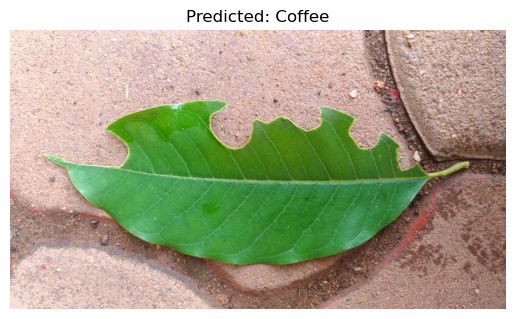

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

model_path = "trained_resnet50_model.h5"
model = load_model(model_path)

def preprocess_image(image_path, target_size=(224, 224)):
    if not os.path.exists(image_path):
        print(f"Image path '{image_path}' does not exist.")
        return None
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image '{image_path}'.")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    return img

def load_and_preprocess_images(image_paths, target_size=(224, 224)):
    images = []
    valid_paths = []
    for image_path in image_paths:
        img = preprocess_image(image_path, target_size)
        if img is not None:
            images.append(img)
            valid_paths.append(image_path)
    return np.array(images), valid_paths

dataset_path = "D:/Medicinal_plant/medicinal_plant_dataset"  

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

class_labels = list(train_generator.class_indices.keys())

test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

image_paths = [
r"D:\Medicinal_plant\P_20190924_101548.jpg"
# r"D:\Medicinal_plant\testing images\138.jpg",
# r"D:\Medicinal_plant\testing images\1425.jpg",
# r"D:\Medicinal_plant\testing images\146.jpg",
# r"D:\Medicinal_plant\testing images\148.jpg",
# r"D:\Medicinal_plant\testing images\188.jpg",
# r"D:\Medicinal_plant\testing images\2.jpg",
# r"D:\Medicinal_plant\testing images\2192.jpg",
# r"D:\Medicinal_plant\testing images\22.jpg",
# r"D:\Medicinal_plant\testing images\236.jpg",
# r"D:\Medicinal_plant\testing images\248.jpg",
# r"D:\Medicinal_plant\testing images\2552.jpg",
# r"D:\Medicinal_plant\testing images\2707.jpg",
# r"D:\Medicinal_plant\testing images\288.jpg",
# r"D:\Medicinal_plant\testing images\290.jpg",
# r"D:\Medicinal_plant\testing images\292.jpg",
# r"D:\Medicinal_plant\testing images\2922.jpg",
# r"D:\Medicinal_plant\testing images\3.jpg",
# r"D:\Medicinal_plant\testing images\3138.jpg",
# r"D:\Medicinal_plant\testing images\324.jpg",
# r"D:\Medicinal_plant\testing images\33.jpg",
# r"D:\Medicinal_plant\testing images\36.jpg",
# r"D:\Medicinal_plant\testing images\3698.jpg",
# r"D:\Medicinal_plant\testing images\3699.jpg",
# r"D:\Medicinal_plant\testing images\373.jpg",
# r"D:\Medicinal_plant\testing images\3744.jpg",
# r"D:\Medicinal_plant\testing images\4.jpg",
# r"D:\Medicinal_plant\testing images\400.jpg",
# r"D:\Medicinal_plant\testing images\410.jpg",
# r"D:\Medicinal_plant\testing images\42.jpg",
# r"D:\Medicinal_plant\testing images\440.jpg",
# r"D:\Medicinal_plant\testing images\456.jpg",
# r"D:\Medicinal_plant\testing images\468.jpg",
# r"D:\Medicinal_plant\testing images\4760.jpg",
# r"D:\Medicinal_plant\testing images\48.jpg",
# r"D:\Medicinal_plant\testing images\4857.jpg",
# r"D:\Medicinal_plant\testing images\5.jpg",
# r"D:\Medicinal_plant\testing images\501.jpg",
# r"D:\Medicinal_plant\testing images\502.jpg",
# r"D:\Medicinal_plant\testing images\5238.jpg",
# r"D:\Medicinal_plant\testing images\54.jpg",
# r"D:\Medicinal_plant\testing images\5564.jpg",
# r"D:\Medicinal_plant\testing images\5887.jpg",
# r"D:\Medicinal_plant\testing images\6.jpg",
# r"D:\Medicinal_plant\testing images\680.jpg",
# r"D:\Medicinal_plant\testing images\707.jpg",
# r"D:\Medicinal_plant\testing images\74.jpg",
# r"D:\Medicinal_plant\testing images\750.jpg",
# r"D:\Medicinal_plant\testing images\788.jpg",
# r"D:\Medicinal_plant\testing images\842.jpg",
# r"D:\Medicinal_plant\testing images\848.jpg",
# r"D:\Medicinal_plant\testing images\850.jpg",
# r"D:\Medicinal_plant\testing images\858.jpg",
# r"D:\Medicinal_plant\testing images\9.jpg",
# r"D:\Medicinal_plant\testing images\952.jpg",
# r"D:\Medicinal_plant\testing images\98.jpg",
# r"D:\Medicinal_plant\testing images\a.1.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20190909_070355319.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20190919_074147275.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20190920_144020455.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20190921_123357.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20190923_152646.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20190929_175050.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20191003_162739.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20201003_165408.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20201005_162441.jpg",
# r"D:\Medicinal_plant\testing images\IMG_20201013_165401.jpg",
# r"D:\Medicinal_plant\testing images\P_20190921_122346.jpg",
# r"D:\Medicinal_plant\testing images\P_20190924_101030.jpg"    
]

images, valid_paths = load_and_preprocess_images(image_paths)

if len(images) == 0:
    print("No valid images to process.")
else:
    predictions = model.predict(images)

    for i, image_path in enumerate(valid_paths):
        predicted_class = np.argmax(predictions[i])
        predicted_label = class_labels[predicted_class]
        print(f"Image: {image_path} - Predicted: {predicted_label}")

        # Display the image and prediction
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()
